In [ ]:
# import libraries

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('bihar_2020.csv')

In [ ]:
# view of top 5 rows

In [18]:
df.head(5)

,Unnamed: 0,osn,candidate,party,evm_votes,postal_votes,total_votes,percentage_votes,contituencty
0,0,1,Dhirendra Pratap Singh alias Rinku singh,Janata Dal (United),74777,129,74906,38.32,1
1,1,2,Baidyanath Prasad,Bahujan Samaj Party,14475,23,14498,7.42,1
2,2,3,Mahendra Kumar Bharti,Lok Jan Shakti Party,6602,10,6612,3.38,1
3,3,4,Rajesh Singh,Indian National Congress,52952,369,53321,27.28,1
4,4,5,Gaurav Jha,The Plurals Party,2862,1,2863,1.46,1


In [ ]:
# total columns in a table 

In [16]:
df.columns

Index(['Unnamed: 0', 'osn', 'candidate', 'party', 'evm_votes', 'postal_votes',
       'total_votes', 'percentage_votes', 'contituencty'],
      dtype='object')

In [ ]:
# renaming the wrong column name 

In [30]:
df.rename(columns={'contituencty':'constituency'},inplace=True

In [ ]:
# Basic Data 

In [40]:
print("Total Rows:",df.shape[0])
print("Total Unique Candidates:",df['candidate'].nunique())
print("Total Unique Constituencies:", df['constituency'].nunique())
print("Total Political Parties:",df['party'].nunique())
party_votes= df.groupby('party')['total_votes'].sum().sort_values(ascending=False).head(10)


Total Rows: 3976
Total Unique Candidates: 3357
Total Unique Constituencies: 243
Total Political Parties: 213


In [44]:
# Bar chart: Top 10 parties by total votes

C:\Users\Gulsa\AppData\Local\Temp\ipykernel_38892\4051900860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_votes.values, y=party_votes.index,palette='viridis')


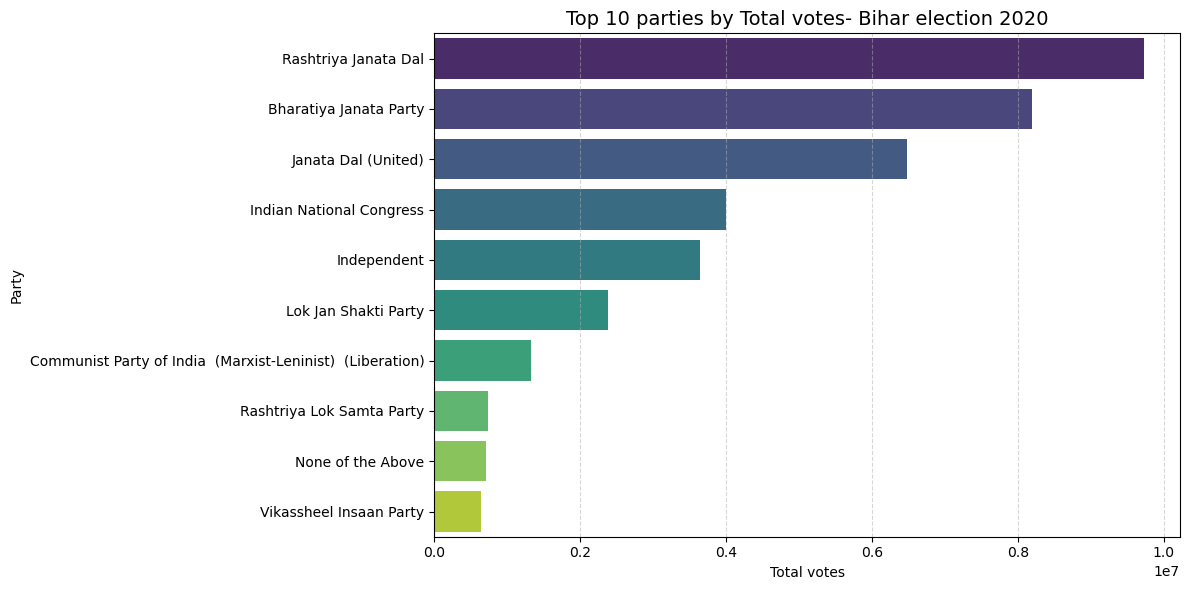

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(x=party_votes.values, y=party_votes.index,palette='viridis')
plt.title('Top 10 parties by Total votes- Bihar election 2020', fontsize=14)
plt.xlabel('Total votes')
plt.ylabel('Party')
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

In [62]:
# Winnners by constituency

In [64]:
winners_df =df.loc[df.groupby('constituency')["total_votes"].idxmax()]

In [68]:
# Seats won by each party 

In [74]:
seat_won = winners_df['party'].value_counts()
seat_won_top10= seat_won.head(10)

In [76]:
# Bar Chart: Seats won by Top 10 Parties

C:\Users\Gulsa\AppData\Local\Temp\ipykernel_38892\3534934071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_votes.values, y=party_votes.index, palette='viridis')


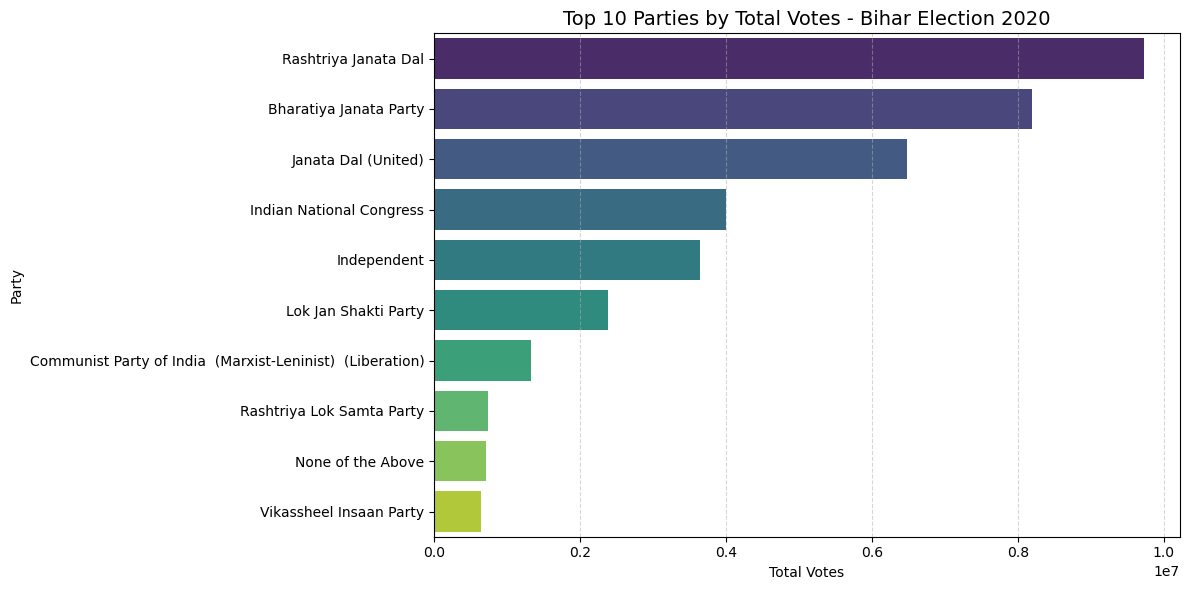

In [84]:
plt.figure(figsize=(12,6))
sns.barplot(x=party_votes.values, y=party_votes.index, palette='viridis')
plt.title('Top 10 Parties by Total Votes - Bihar Election 2020', fontsize=14)
plt.xlabel('Total Votes')
plt.ylabel('Party')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [113]:
# Redefine seats_won_top10 to ensure it's available
seats_won_top10 = winners_df['party'].value_counts().head(10)

In [ ]:
# Pie chart of Seat Share

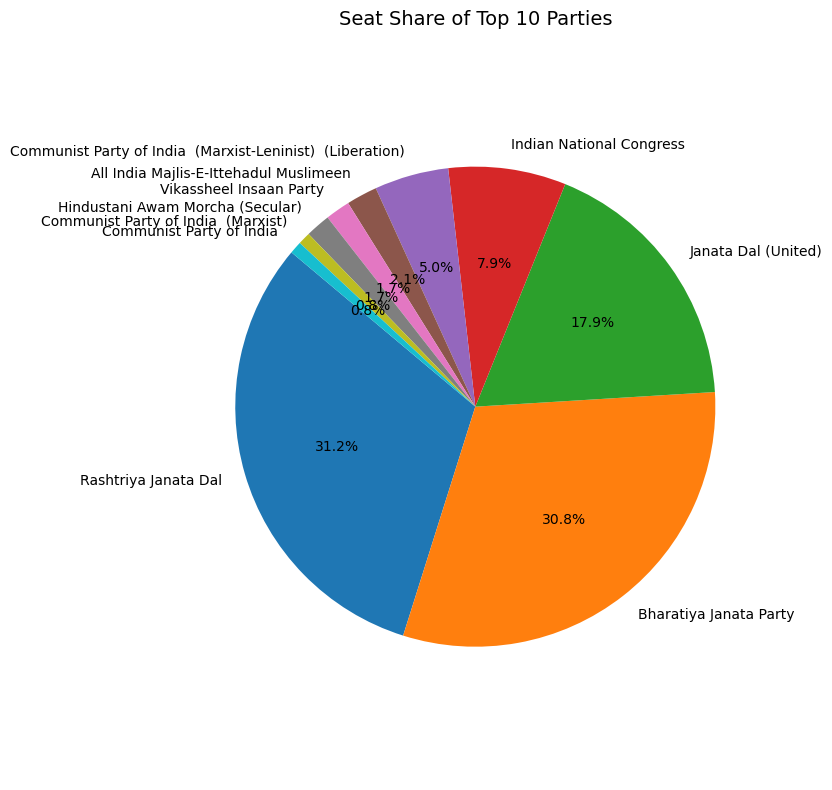

In [115]:
plt.figure(figsize=(8, 8))
plt.pie(seats_won_top10.values,
        labels=seats_won_top10.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('tab10', len(seats_won_top10)))
plt.title('Seat Share of Top 10 Parties', fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.show()


In [ ]:
# Distribution of vote percentage (all candidate)

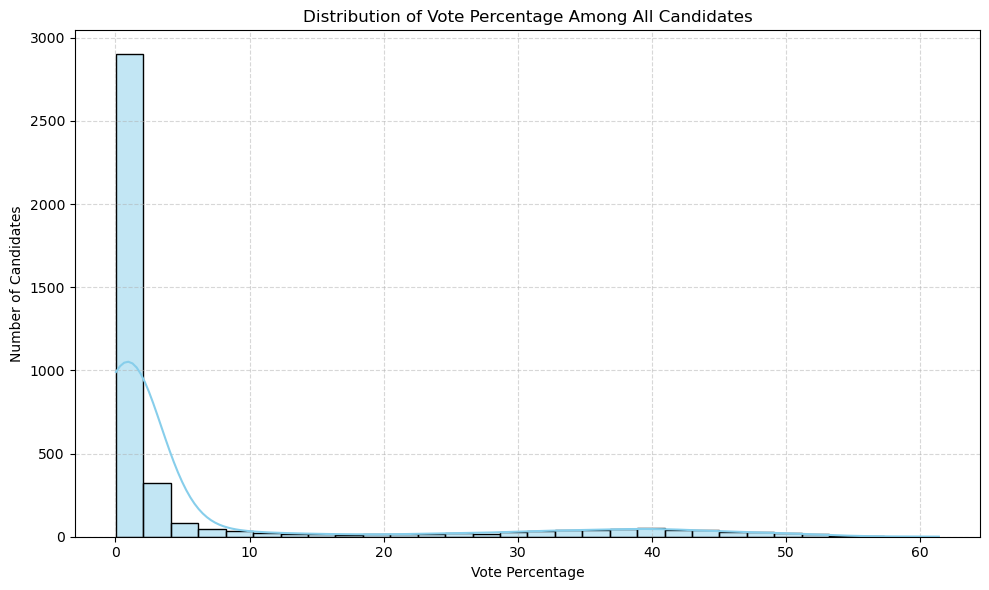

In [118]:
plt.figure(figsize=(10,6))
sns.histplot(df['percentage_votes'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Vote Percentage Among All Candidates')
plt.xlabel('Vote Percentage')
plt.ylabel('Number of Candidates')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [121]:
# Save full cleaned data
df.to_csv("bihar_2020_cleaned.csv", index=False)

# Save winners (top candidate per constituency)
winners_df.to_csv("bihar_election_winners.csv", index=False)


In [123]:
plt.savefig("top_10_parties_votes.png")


<Figure size 640x480 with 0 Axes>

In [125]:
plt.savefig("seats_won_bar_chart.png")  

<Figure size 640x480 with 0 Axes>

In [127]:
plt.savefig("seat_share_pie_chart.png")


<Figure size 640x480 with 0 Axes>

In [132]:
plt.savefig("vote_percentage_distribution.png") 

<Figure size 640x480 with 0 Axes>